In [12]:
import astropy.io.fits as pf
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
plt.rcParams["figure.figsize"] = (12,10)

### Abertura dos arquivos
"The `open()` function returns an object called an HDUList which is a list-like collection of HDU objects. An HDU (Header Data Unit) is the highest level component of the FITS file structure, consisting of a header and (typically) a data array or table."

O arquivo tem um header com chaves que especificam seu conteúdo.

In [32]:
obs_path = 'spectra/HD110379/obs_HD110379_ordens_finalglue.fits'
tel_path = 'spectra/HD110379/tellstar_qvir_ordens_finalglue.fits'

In [33]:
with pf.open(obs_path) as spectrum_obs:
    spectrum_obs.info()
    primary_hdu = spectrum_obs[0]

Filename: spectra/HD110379/obs_HD110379_ordens_finalglue.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     539   (595493,)   float64   


In [34]:
pf.getheader(obs_path)

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -64 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =               595493 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
IRAF-TLM= '2013-10-10T19:32:18' / Time of last modification                     
OBJECT  = 'RED_NONMERGED_SCI_POINT_REDU' / Name of the object observed          
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2013-10-08T17:59:44' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
CTYPE1  = 'LINEAR  '                                                            
BUNIT   = 'ADU     '        

In [35]:
spec_data = pf.getdata(obs_path)
spec_data.shape

(595493,)

In [36]:
ftfile = pf.open(obs_path)

In [37]:
wl_i = ftfile[0].header['CRVAL1']
wl_step = ftfile[0].header['CDELT1']
wavelength = np.arange(spec_data.size)*wl_step+wl_i      # wavelength

In [38]:
spec_data

array([1.        , 1.        , 1.        , ..., 0.96092611, 0.96647718,
       0.97290312])

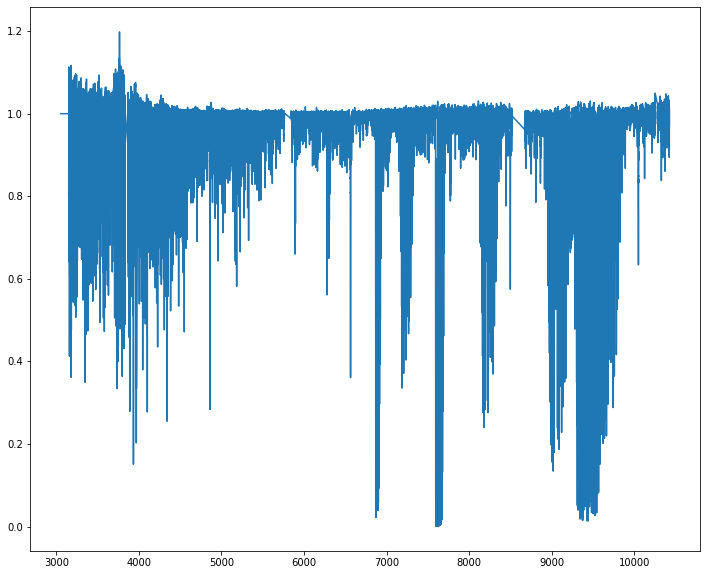

In [39]:
plt.plot(wavelength, spec_data)

In [40]:
wl_max = wavelength.max()
wl_min = wavelength.min()
flx_max = spec_data.max()
flx_min = spec_data.min()

### Seguindo exemplo do notebook da Malu

In [41]:
import scipy.interpolate as interp

In [42]:
my_step = 0.05

In [43]:
interpolation_function = interp.interp1d(wavelength, spec_data)

In [44]:
new_wavelength = np.arange(start=wl_min,  stop=wl_max, step=my_step)

In [45]:
new_flux = np.arange(start=flx_min, stop=flx_max)
new_flux = interpolation_function(new_wavelength)

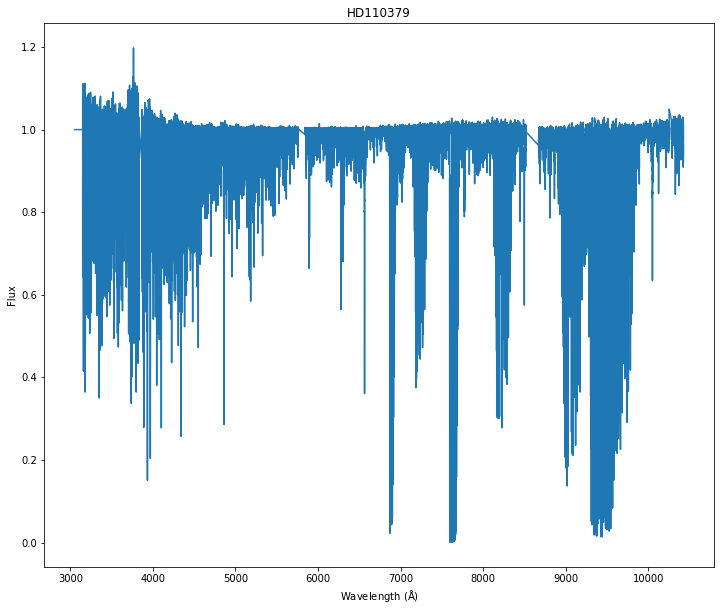

In [64]:
plt.plot(new_wavelength, new_flux, '-')
plt.xlabel(r"Wavelength ($\mathrm{\AA}$)")
plt.ylabel(r"Flux")
plt.title('HD110379')
plt.show()

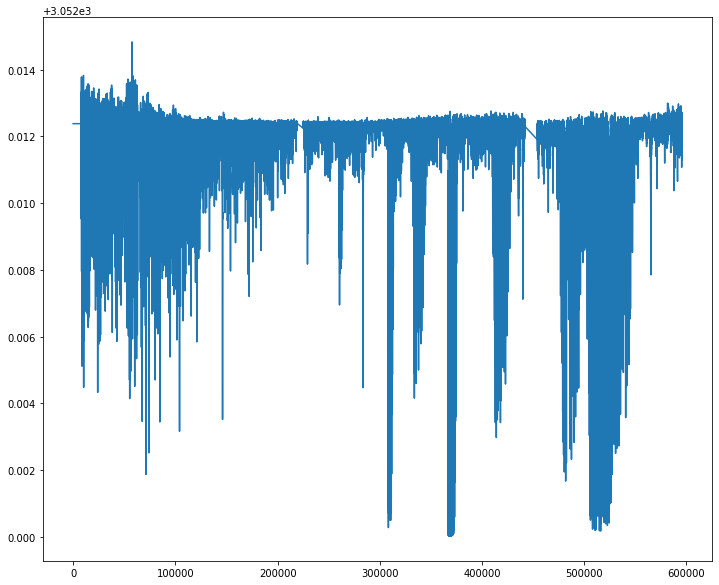

In [49]:
with pf.open(obs_path) as hdu:
    data = hdu[0].data
    hdr = hdu[0].header #added to try2
    step = hdr['CDELT1'] #added to try2
    restw = hdr['CRVAL1'] #added to try2
    spectra = restw + (data * step) #added to try
    
    plt.plot(spectra)
    plt.show()

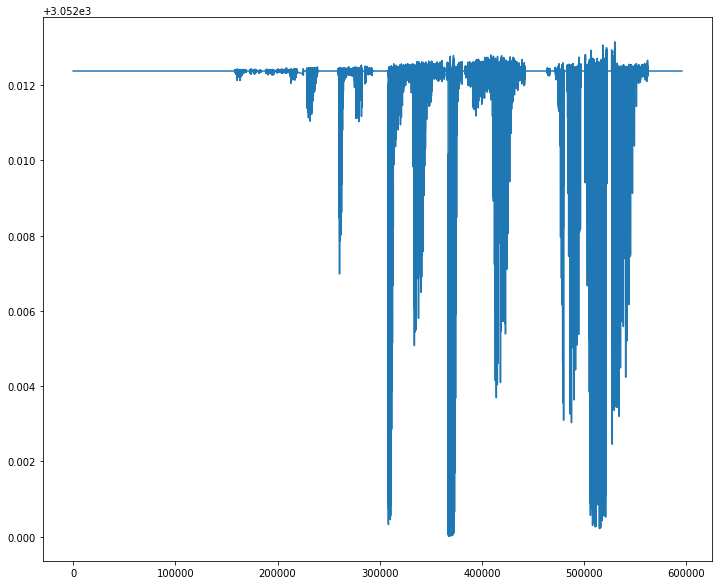

In [50]:
with pf.open(tel_path) as hdu:
    data = hdu[0].data
    hdr = hdu[0].header #added to try2
    step = hdr['CDELT1'] #added to try2
    restw = hdr['CRVAL1'] #added to try2
    spectra = restw + (data * step) #added to try
    
    plt.plot(spectra)
    plt.show()

In [51]:
ardata = pf.open('spectra/ardata.fits')
# step = hdr['CDELT1'] #added to try2
# restw = hdr['CRVAL1'] #added to try2
# spectra = restw + (data * step) #added to try

# plt.plot(spectra)
# plt.show()

In [52]:
ardata.info()

Filename: spectra/ardata.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 BinTableHDU     29   762078R x 4C   [1D, 1E, 1E, 1E]   


In [53]:
ardata[0].header

SIMPLE  =                    T /Written by IDL:  Mon Feb 28 17:09:21 2000       
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
EXTEND  =                    T /File contains extensions                        
NEXTEND =                    1 /Number of standard extensions                   
DATE    = '2000-02-28'         /                                                

In [54]:
data = ardata[1].data
ardata[1].columns

ColDefs(
    name = 'WAVELENGTH'; format = '1D'; disp = 'F9.4'
    name = 'ARCTURUS'; format = '1E'; disp = 'F7.4'
    name = 'SOLARFLUX'; format = '1E'; disp = 'F7.4'
    name = 'TELLURIC'; format = '1E'; disp = 'F7.4'
)

In [55]:
wl_ardata = data['WAVELENGTH']
arcturus_flux = data['ARCTURUS']
solarflux = data['SOLARFLUX']
tell_ardata = data['TELLURIC']

In [56]:
hdu = pf.open(obs_path)
data_new = hdu[0].data
hdr = hdu[0].header #added to try2
step = hdr['CDELT1'] #added to try2
restw = hdr['CRVAL1'] #added to try2
spectra = restw + (data * step) #added to try

TypeError: invalid type promotion

In [57]:
arcturus_flux

array([ 0.4408,  0.4565,  0.4739, ..., -1.    , -1.    , -1.    ],
      dtype=float32)

In [58]:
step

0.012379642365

In [59]:
restw

3052.0

In [60]:
spectra

array([3052.01237539, 3052.01237539, 3052.01237539, ..., 3052.01237539,
       3052.01237539, 3052.01237539])

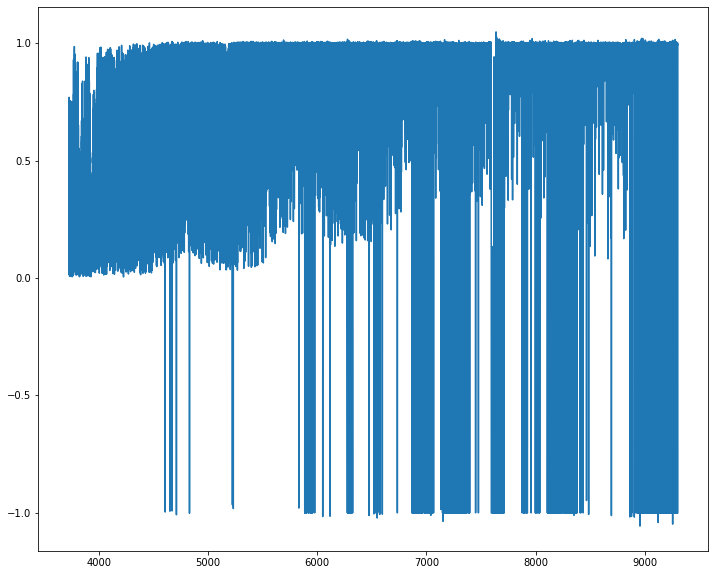

In [61]:
plt.plot(wl_ardata, arcturus_flux)

Text(0.5, 1.0, 'Sun')

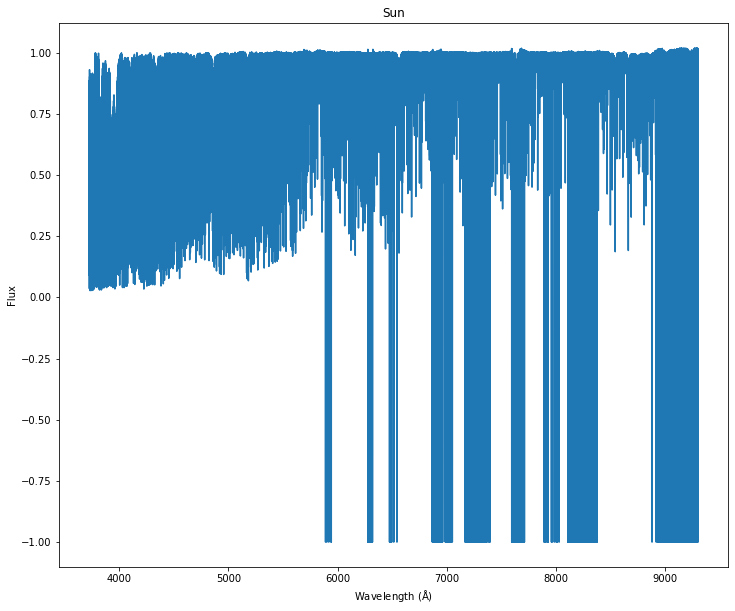

In [65]:
plt.plot(wl_ardata, solarflux)
plt.xlabel(r"Wavelength ($\mathrm{\AA}$)")
plt.ylabel(r"Flux")
plt.title('Sun')

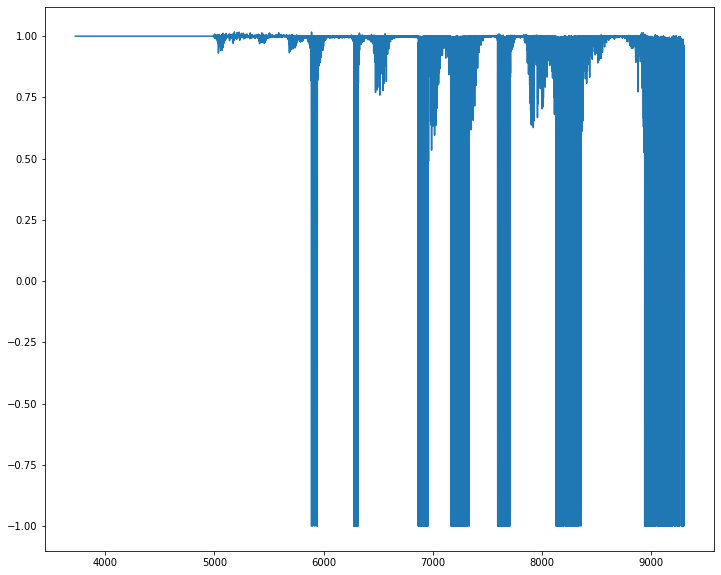

In [63]:
plt.plot(wl_ardata, tell_ardata)

In [64]:
# INTERPOLATE TO SAME WAVELENGTH GRID 